# Banana Republic Analysis

In [9]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("municipality_bus_utilization.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [4]:
df.shape

(13070, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [6]:
df.isnull().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [7]:
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


## Data Visualization

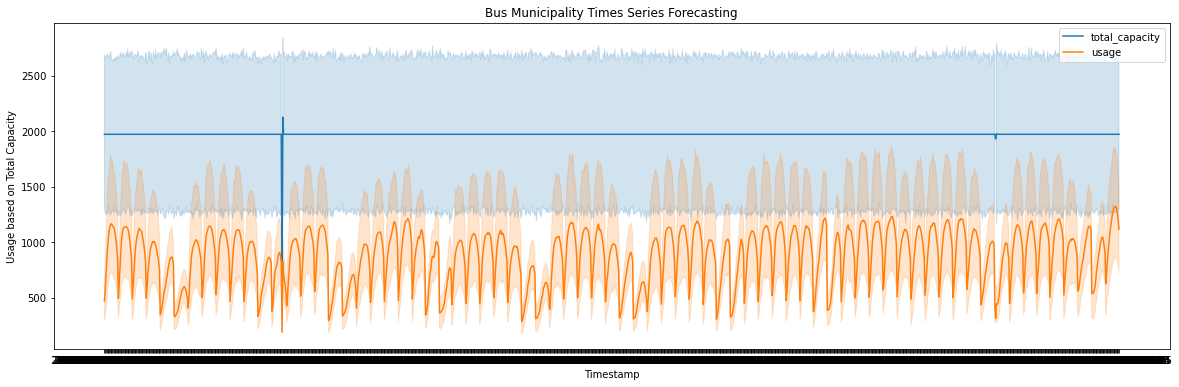

In [10]:
plt.figure(figsize=(20,6))
sns.lineplot(y=df['total_capacity'],x = df['timestamp'],linewidth = 1.5 , label = 'total_capacity')
sns.lineplot(y=df['usage'],x = df['timestamp'],linewidth = 1.5 , label = 'usage')
plt.xlabel ('Timestamp')
plt.ylabel ('Usage based on Total Capacity')
plt.title('Bus Municipality Times Series Forecasting')
plt.show()

## Model

### Train Test Split

In [11]:
# Use the last two weeks (starting from 2017-08-05 to 2017-08-19) as assessment (test) data.
mask = (df["timestamp"] > "2017-08-05") & (df["timestamp"] <= "2017-08-19")
test_data = df.loc[mask]
train_data = df.drop(range(10390,12890))

In [15]:
test_data

In [16]:
train_data

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [18]:
train_data.shape, test_data.shape

((10570, 4), (2500, 4))

In [67]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [60]:
train_data.timestamp = train_data['timestamp'].values.astype('datetime64[D]')
test_data.timestamp = test_data['timestamp'].values.astype('datetime64[D]')

In [68]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(train_data, test_data, test_size=0.3)

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined